In [14]:
import unicodedata 
import time
import pandas as pd
import numpy as np
import random
import nltk
import collections
import itertools
import csv
import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

from sklearn.cross_validation import train_test_split
import sys 


In [5]:
# Variable Globale
HEADER_TEST = ['Question','Intent','BlockId', 'Action']
HEADER_TRAIN =['Question','Intent','BlockId', 'Action']
data_all = pd.read_csv("C:\Users\PC de Laure\Desktop\INSA_wefight_data_clean.csv",sep=";",names=HEADER_TRAIN,nrows=5014)

data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 4 columns):
Question    5013 non-null object
Intent      5013 non-null object
BlockId     5013 non-null object
Action      4919 non-null object
dtypes: object(4)
memory usage: 156.7+ KB


In [17]:
intents = pd.Series(data_all['Intent'])
A=intents.value_counts(sort=True)
print "nombre de catégories"
print len(A) #nb de categories
print "noms des categ et nb d'occurrence"
A #categ et leurs nb d'occurrences

nombre de catégories
146
noms des categ et nb d'occurrence


#6-49_TRTEINS_Peau                             215
#6-97_TRTEINS_Nausees_Vomissements             141
#6-92_TRTEINS_Diarrhee                         139
#2-130_QVDP_Alimentation                       132
#6-53_TRTEINS_Aphtes                           125
#6-90_TRTEINS_Mauvais_Gout                     119
#6-98_TRTEINS_EI_Frequents                     113
#2-36_QVDP_Alopecie_Pourquoi                   112
#6-60_TRTEINS_PAC                              106
#9-2_Informations_cancer                       105
#6-18_TRTEINS_Radiotherapie                     93
#2-64-0_QVDP_Fatigue                            92
#6-57_TRTEINS_Yeux_Secs                         91
#2-55_QVDP_Douleur                              88
conversation_rappel_rendezvous                  86
#6-96_TRTEINS_Perte_Poids                       83
#2-45_QVDP_Alopecie_Perruque                    83
#6-1_TRTEINS_Chimiotherapie                     81
#2-96_QVDP_Social_Priseencharge                 78
#6-58_TRTEINS_Bouche_Seche     

In [7]:
list=[]
for i in range(5013):
    if not(intents[i] in list):
        list.append(intents[i])

list.remove('intent')
print "Liste des noms des intents :"
list


Liste des noms des intents :


['#000_Menu_General',
 '#001_Abonnement',
 '#001_Gestion_Abonnement',
 '#1-4_Menu_Patient_Recent',
 '#1-5_Menu_Aidant',
 '#1-8_Menu_Traitement',
 '#2-100_QVDP_Social_Transports',
 '#2-101_QVDP_Social_RbProthese',
 '#2-102_QVDP_Social_RbPerruque',
 '#2-103_QVDP_Social_Banque',
 '#2-106_QVDP_Social_HAD',
 '#2-107_QVDP_Grossesse',
 '#2-109_QVDP_Grossesse_Chimiotherapie',
 '#2-110_QVDP_Grossesse_Radiotherapie',
 '#2-111_QVDP_Grossesse_Chirurgie',
 '#2-112_QVDP_Grossesse_Hormonotherapie',
 '#2-115_QVDP_Grossesse_Allaitement',
 '#2-118_QVDP_Grossesse_Malformations',
 '#2-120_QVDP_Sexualite',
 '#2-121_QVDP_Sexualite_Cicatrice',
 '#2-122_QVDP_Sexualite_Alopecie',
 '#2-123_QVDP_Sexualite_Prothese',
 '#2-124_QVDP_Sexualite_PerteConfiance',
 '#2-125_QVDP_Sexualite_Reconstruction',
 '#2-126_QVDP_Sexualite_BaisseLibido',
 '#2-128_QVDP_Sexualite_Couple',
 '#2-130_QVDP_Alimentation',
 '#2-133_QVDP_RegimeAnticancer',
 '#2-134_QVDP_Alimentation_Citron',
 '#2-135_QVDP_Alimentation_Alcool',
 '#2-137_QVDP

In [8]:
intents2=data_all.groupby('Intent')
intents2.size()

Intent
#000_Menu_General                         10
#001_Abonnement                            1
#001_Gestion_Abonnement                   40
#1-4_Menu_Patient_Recent                   9
#1-5_Menu_Aidant                          44
#1-8_Menu_Traitement                      18
#2-100_QVDP_Social_Transports             13
#2-101_QVDP_Social_RbProthese             18
#2-102_QVDP_Social_RbPerruque             18
#2-103_QVDP_Social_Banque                 39
#2-106_QVDP_Social_HAD                    28
#2-107_QVDP_Grossesse                     65
#2-109_QVDP_Grossesse_Chimiotherapie      31
#2-110_QVDP_Grossesse_Radiotherapie       21
#2-111_QVDP_Grossesse_Chirurgie           20
#2-112_QVDP_Grossesse_Hormonotherapie     14
#2-115_QVDP_Grossesse_Allaitement         44
#2-118_QVDP_Grossesse_Malformations       16
#2-120_QVDP_Sexualite                     66
#2-121_QVDP_Sexualite_Cicatrice           18
#2-122_QVDP_Sexualite_Alopecie            15
#2-123_QVDP_Sexualite_Prothese            16
#2-

In [21]:
j=0
val=[]
for i in (list):
    val.append(A[i])
    j=j+1

val

[10,
 1,
 40,
 9,
 44,
 18,
 13,
 18,
 18,
 39,
 28,
 65,
 31,
 21,
 20,
 14,
 44,
 16,
 66,
 18,
 15,
 16,
 12,
 57,
 30,
 57,
 132,
 27,
 22,
 26,
 20,
 112,
 38,
 42,
 59,
 28,
 83,
 23,
 37,
 39,
 28,
 31,
 88,
 18,
 28,
 22,
 22,
 39,
 92,
 19,
 17,
 33,
 24,
 54,
 18,
 32,
 35,
 13,
 35,
 6,
 7,
 32,
 19,
 78,
 24,
 56,
 19,
 18,
 93,
 81,
 17,
 16,
 73,
 15,
 52,
 16,
 62,
 9,
 15,
 19,
 24,
 42,
 13,
 9,
 3,
 215,
 125,
 91,
 73,
 4,
 106,
 16,
 25,
 41,
 12,
 4,
 19,
 19,
 30,
 57,
 7,
 25,
 9,
 13,
 119,
 10,
 139,
 57,
 16,
 50,
 83,
 141,
 113,
 15,
 10,
 32,
 15,
 5,
 5,
 6,
 10,
 8,
 7,
 30,
 22,
 105,
 9,
 53,
 6,
 35,
 86,
 3,
 20,
 11,
 7,
 4,
 4,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2]

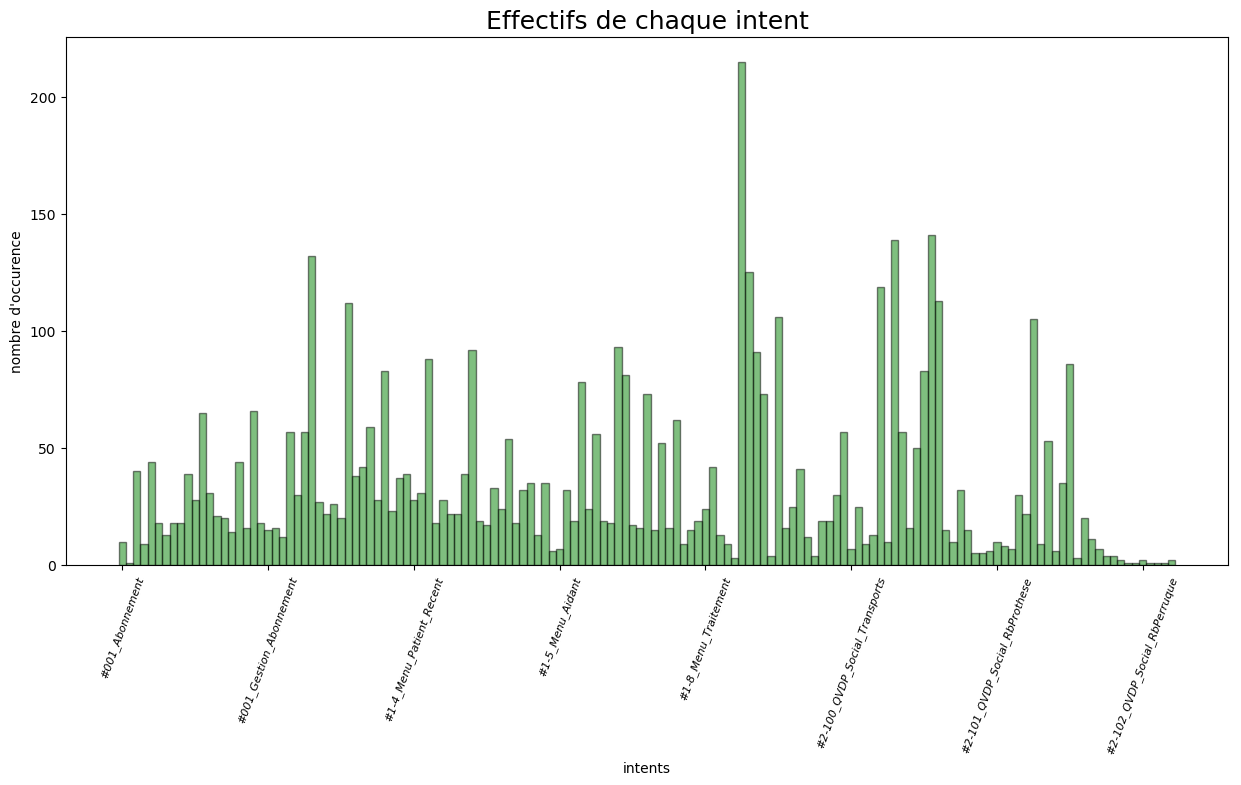

In [22]:
plt.figure(figsize=(15,7),dpi=100)
plt.title("Effectifs de chaque intent",fontsize=18)
x = range(145)
y = val
plt.bar(x, y, width=1, alpha=0.5, color="green", edgecolor="black")
plt.gca().xaxis.set_ticklabels(list, rotation = 70, color = 'black', fontsize = 8, style = 'italic')
xlabel("intents")
ylabel("nombre d'occurence")
plt.show()

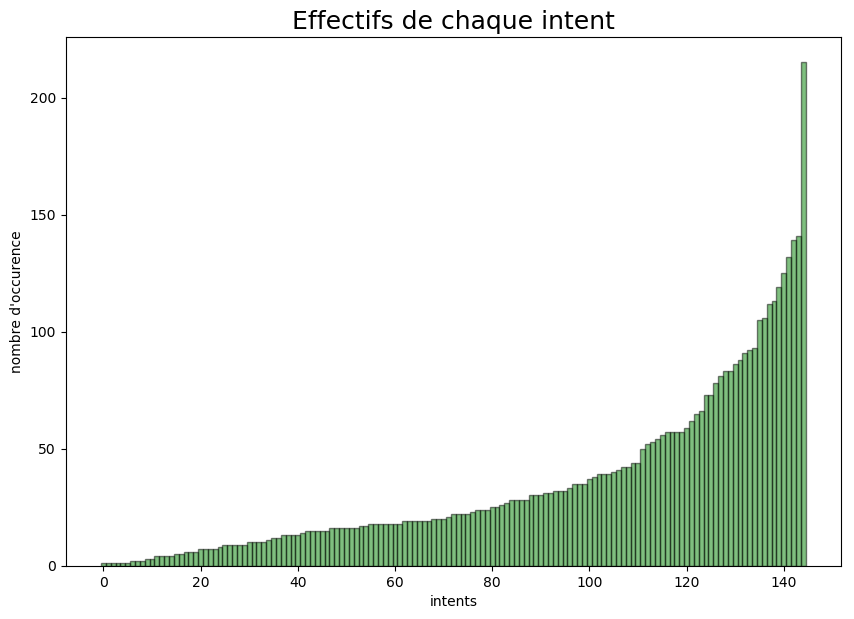

In [19]:
val.sort()
plt.figure(figsize=(10,7),dpi=100)
plt.title("Effectifs de chaque intent",fontsize=18)
x = range(145)
y = val
plt.bar(x, y, width=1, alpha=0.5, color="green", edgecolor="black")
xlabel("intents")
ylabel("nombre d'occurence")
plt.show()

On voit que l'intent 145 apparait beaucoup plus que les autres, c'est la catégorie :#6-49_TRTEINS_Peau avec 215 occurence sur 5015

In [23]:
A

#6-49_TRTEINS_Peau                             215
#6-97_TRTEINS_Nausees_Vomissements             141
#6-92_TRTEINS_Diarrhee                         139
#2-130_QVDP_Alimentation                       132
#6-53_TRTEINS_Aphtes                           125
#6-90_TRTEINS_Mauvais_Gout                     119
#6-98_TRTEINS_EI_Frequents                     113
#2-36_QVDP_Alopecie_Pourquoi                   112
#6-60_TRTEINS_PAC                              106
#9-2_Informations_cancer                       105
#6-18_TRTEINS_Radiotherapie                     93
#2-64-0_QVDP_Fatigue                            92
#6-57_TRTEINS_Yeux_Secs                         91
#2-55_QVDP_Douleur                              88
conversation_rappel_rendezvous                  86
#6-96_TRTEINS_Perte_Poids                       83
#2-45_QVDP_Alopecie_Perruque                    83
#6-1_TRTEINS_Chimiotherapie                     81
#2-96_QVDP_Social_Priseencharge                 78
#6-58_TRTEINS_Bouche_Seche     